# Mariners 2026 Data Science Intern Problem Set - Problem 1
## Enhanced Runner Advancement Prediction - Comprehensive Analysis

### Executive Summary
This notebook presents a comprehensive analysis for predicting runner advancement probability in baseball. The enhanced model incorporates 80+ engineered features across multiple categories including game context, ball tracking, runner intelligence, fielder context, temporal analysis, and statistical baselines. This analysis goes beyond simple feature engineering to create a sophisticated model that captures the complex dynamics of baseball situations.

### Problem Statement
Given play-by-play data, predict the probability that a runner will advance to the next base. This is a binary classification problem where we need to predict P(runner_advance = 1) for each play. The challenge involves understanding situational factors, player characteristics, game context, and ball tracking data to make accurate predictions about runner advancement decisions.

### Analysis Scope
The enhanced analysis includes:
- **Game Context**: Inning, score differential, leverage situations, late-game scenarios
- **Ball Tracking**: Launch angle, exit velocity, hit distance, spin rate, trajectory analysis
- **Runner Intelligence**: Sprint speed, base position, multiple runners, situational awareness
- **Fielder Context**: Position, throw speed, handedness, defensive positioning
- **Temporal Analysis**: Season trends, month effects, game progression
- **Statistical Baselines**: Contextual and constant baselines for performance comparison
- **Advanced Features**: Interaction terms, ratios, categories, and engineered metrics


## Enhanced Model Import and Setup

This section handles the import of all necessary libraries and the enhanced model. The setup includes:
- **Data Analysis Libraries**: pandas, numpy for data manipulation and numerical operations
- **Visualization Libraries**: matplotlib, seaborn for creating comprehensive plots and charts
- **Machine Learning Libraries**: scikit-learn for model training, evaluation, and preprocessing
- **Enhanced Model Import**: Portable path detection to load the comprehensive model from RawCode directory
- **Plotting Configuration**: Professional styling and figure sizing for publication-ready visualizations

The enhanced model incorporates 80+ engineered features and advanced modeling techniques including model calibration, comprehensive baseline calculations, and sophisticated feature engineering across multiple data categories.


In [17]:
# Import comprehensive analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Import enhanced model (portable path)
import sys
import os

# Add the RawCode directory to the path
current_dir = os.getcwd()
rawcode_path = os.path.join(current_dir, 'RawCode')
if os.path.exists(rawcode_path):
    sys.path.append(rawcode_path)
    from problem_1_model import EnhancedRunnerAdvancementModel
    print("Enhanced runner advancement model loaded from RawCode/")
else:
    # Try alternative path structure
    problem1_path = os.path.join(current_dir, 'Problem_1', 'RawCode')
    if os.path.exists(problem1_path):
        sys.path.append(problem1_path)
        from problem_1_model import EnhancedRunnerAdvancementModel
        print("Enhanced runner advancement model loaded from Problem_1/RawCode/")
    else:
        print("Could not find problem_1_model_enhanced.py. Please ensure the file is in the correct location.")
        print("Expected locations: RawCode/ or Problem_1/RawCode/")

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

print("Enhanced analysis libraries imported successfully")


Enhanced runner advancement model loaded from RawCode/
Enhanced analysis libraries imported successfully


## Comprehensive Analysis - All Features

This section executes the complete enhanced analysis pipeline that incorporates all available data sources and engineered features. The analysis includes:

- **Data Loading**: Loads training data, test data, and outfield position tracking data
- **Baseline Calculations**: Computes constant baseline (always predict mean) and contextual baseline (out-of-fold contextual predictions)
- **Outfield Tracking Integration**: Merges position tracking data with play-by-play data for enhanced spatial analysis
- **Comprehensive Feature Engineering**: Creates 80+ features across multiple categories:
  - Game context features (inning, score, leverage situations)
  - Ball tracking features (launch angle, exit velocity, distance, spin rate)
  - Runner intelligence features (sprint speed, base position, multiple runners)
  - Fielder context features (position, throw speed, handedness)
  - Temporal analysis features (season trends, month effects)
  - Advanced interaction terms and ratios
- **Model Training**: Trains multiple algorithms (Random Forest, Gradient Boosting, Logistic Regression) with proper cross-validation
- **Model Calibration**: Applies isotonic calibration for reliable probability estimates
- **Performance Evaluation**: Compares model performance against baselines and provides comprehensive metrics


In [18]:
# Run comprehensive enhanced analysis
print("=== ENHANCED RUNNER ADVANCEMENT PREDICTION ===")
print("Running comprehensive analysis with 50+ features...")

# Initialize enhanced analyzer
model = EnhancedRunnerAdvancementModel()

# Run comprehensive analysis - FIXED: Handle 4 return values correctly
try:
    calibrated_model, predictions, submission, original_best_model = model.run_comprehensive_analysis()
    print(f"\nANALYSIS COMPLETE!")
    print(f"Used comprehensive feature engineering with 50+ features")
    print(f"Enhanced model trained and predictions generated")
    
    # Store models for visualization
    best_model = original_best_model  # For learning curves and evaluation
    
except Exception as e:
    print(f"Error: {e}")
    print("Please check that all required libraries are installed and data files are accessible.")


=== ENHANCED RUNNER ADVANCEMENT PREDICTION ===
Running comprehensive analysis with 50+ features...
=== MARINERS 2026 DATA SCIENCE INTERN PROBLEM SET ===
Problem 1: Enhanced Runner Advancement Prediction - Comprehensive Analysis
=== LOADING ALL AVAILABLE DATA ===
Data loaded from: ../Data/train_data.csv
Training data: (15533, 33)
Test data: (2684, 33)
Outfield position data: (62574, 6)

=== CALCULATING BASELINES ===
Constant baseline (always predict 0.499): 0.6931

=== MERGING OUTFIELD TRACKING DATA ===
Outfield tracking data merged

=== COMPREHENSIVE FEATURE ENGINEERING ===
Created comprehensive feature set with 88 features
Contextual baseline: 0.6930

=== CREATING STATISTICAL BASELINES ===

=== PREPARING FEATURES FOR MODELING ===
Final feature set: 80 features
Training samples: 15533
Test samples: 2684

=== TRAINING ENHANCED MODELS ===
Training RandomForest...
RandomForest CV Log Loss: 0.3683 (+/- 0.0126)
Training HistGradientBoosting...
HistGradientBoosting CV Log Loss: 0.3269 (+/- 0

## Visualization Functions

This section defines comprehensive visualization functions for model evaluation and analysis. The functions include:

- **`plot_model_evaluation()`**: Creates a 2x2 grid of essential model evaluation plots:
  - ROC Curve with AUC score for classification performance
  - Precision-Recall Curve with Average Precision for imbalanced data analysis
  - Confusion Matrix for detailed classification results
  - Prediction Distribution by Class for understanding model behavior
- **`plot_learning_curves()`**: Analyzes model learning behavior with training set size:
  - Training vs validation scores to detect overfitting/underfitting
  - Error bars showing uncertainty in performance estimates
  - Proper GroupKFold validation to maintain game-level integrity
- **`plot_prediction_distribution()`**: Analyzes the distribution of model predictions:
  - Histogram with mean and median lines for prediction spread
  - Box plot with comprehensive statistics (mean, median, std, min, max)
  - Statistical summary for understanding prediction characteristics

These visualizations provide comprehensive insights into model performance, learning behavior, and prediction characteristics for thorough model evaluation.


In [19]:
def plot_model_evaluation(model, X, y, feature_columns, title="Model Evaluation"):
    """Create comprehensive model evaluation plots"""
    print(f"\n=== CREATING {title.upper()} ===")
    
    # Get predictions
    y_pred_proba = model.predict_proba(X)[:, 1]
    y_pred = model.predict(X)
    
    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    # 1. ROC Curve
    from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0, 0].set_xlim([0.0, 1.0])
    axes[0, 0].set_ylim([0.0, 1.05])
    axes[0, 0].set_xlabel('False Positive Rate')
    axes[0, 0].set_ylabel('True Positive Rate')
    axes[0, 0].set_title('ROC Curve')
    axes[0, 0].legend(loc="lower right")
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y, y_pred_proba)
    avg_precision = average_precision_score(y, y_pred_proba)
    
    axes[0, 1].plot(recall, precision, color='darkorange', lw=2, 
                   label=f'PR curve (AP = {avg_precision:.3f})')
    axes[0, 1].set_xlim([0.0, 1.0])
    axes[0, 1].set_ylim([0.0, 1.05])
    axes[0, 1].set_xlabel('Recall')
    axes[0, 1].set_ylabel('Precision')
    axes[0, 1].set_title('Precision-Recall Curve')
    axes[0, 1].legend(loc="lower left")
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Calibration Plot
    from sklearn.calibration import calibration_curve
    fraction_of_positives, mean_predicted_value = calibration_curve(y, y_pred_proba, n_bins=10)
    
    axes[0, 2].plot(mean_predicted_value, fraction_of_positives, "s-", color='darkorange', 
                   label="Model")
    axes[0, 2].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    axes[0, 2].set_xlabel('Mean Predicted Probability')
    axes[0, 2].set_ylabel('Fraction of Positives')
    axes[0, 2].set_title('Calibration Plot')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
    axes[1, 0].set_title('Confusion Matrix')
    axes[1, 0].set_xlabel('Predicted')
    axes[1, 0].set_ylabel('Actual')
    
    # 5. Prediction Distribution
    axes[1, 1].hist(y_pred_proba[y == 0], bins=30, alpha=0.7, label='No Advance', color='red')
    axes[1, 1].hist(y_pred_proba[y == 1], bins=30, alpha=0.7, label='Advance', color='blue')
    axes[1, 1].set_xlabel('Predicted Probability')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Prediction Distribution by Class')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

In [20]:
def plot_learning_curves(model, X, y, groups, title="Model Learning Curves"):
    """Plot learning curves for the model"""
    print(f"\n=== CREATING {title.upper()} ===")
    
    from sklearn.model_selection import learning_curve
    
    # Use accuracy scoring to avoid log_loss issues with single-class folds
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, groups=groups, cv=5, scoring='accuracy', 
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    # Calculate means and standard deviations
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                    alpha=0.1, color='blue')
    plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                    alpha=0.1, color='red')
    
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_cv_scores(models, cv_scores, title="Cross-Validation Performance Comparison"):
    """Plot cross-validation scores comparison"""
    print(f"\n=== CREATING {title.upper()} ===")
    
    plt.figure(figsize=(10, 6))
    model_names = list(models.keys())
    scores = list(cv_scores.values())
    
    bars = plt.bar(model_names, scores, color=['steelblue', 'orange', 'green', 'red'])
    plt.xlabel('Models')
    plt.ylabel('Cross-Validation Log Loss')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, score in zip(bars, scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                f'{score:.4f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def plot_prediction_distribution(predictions, title="Prediction Distribution"):
    """Plot distribution of model predictions"""
    print(f"\n=== CREATING {title.upper()} ===")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Histogram of predictions
    ax1.hist(predictions, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax1.axvline(predictions.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {predictions.mean():.3f}')
    ax1.axvline(np.median(predictions), color='orange', linestyle='--', linewidth=2,
                label=f'Median: {np.median(predictions):.3f}')
    ax1.set_xlabel('Predicted Probability')
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'{title} - Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Box plot
    ax2.boxplot(predictions, vert=True)
    ax2.set_ylabel('Predicted Probability')
    ax2.set_title(f'{title} - Box Plot')
    ax2.grid(True, alpha=0.3)
    
    # Add statistics text
    stats_text = f"""
    Statistics:
    Mean: {predictions.mean():.4f}
    Median: {np.median(predictions):.4f}
    Std: {predictions.std():.4f}
    Min: {predictions.min():.4f}
    Max: {predictions.max():.4f}
    """
    ax2.text(0.02, 0.98, stats_text, transform=ax2.transAxes,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return fig


## Generate Comprehensive Visualizations

This section executes all visualization functions to create a complete analysis suite. The visualizations include:

- **Enhanced Model Evaluation**: 2x2 grid showing ROC curve, precision-recall curve, confusion matrix, and prediction distribution by class
- **Learning Curves Analysis**: Training vs validation performance across different training set sizes to assess model learning behavior
- **Prediction Distribution Analysis**: Histogram and box plot of final model predictions with comprehensive statistics

These visualizations provide a complete picture of model performance, learning behavior, and prediction characteristics, enabling thorough evaluation of the enhanced model's capabilities and reliability.



=== GENERATING COMPREHENSIVE VISUALIZATIONS ===

=== PREPARING FEATURES FOR MODELING ===
Final feature set: 80 features
Training samples: 15533
Test samples: 2684

=== CREATING ENHANCED MODEL EVALUATION ===


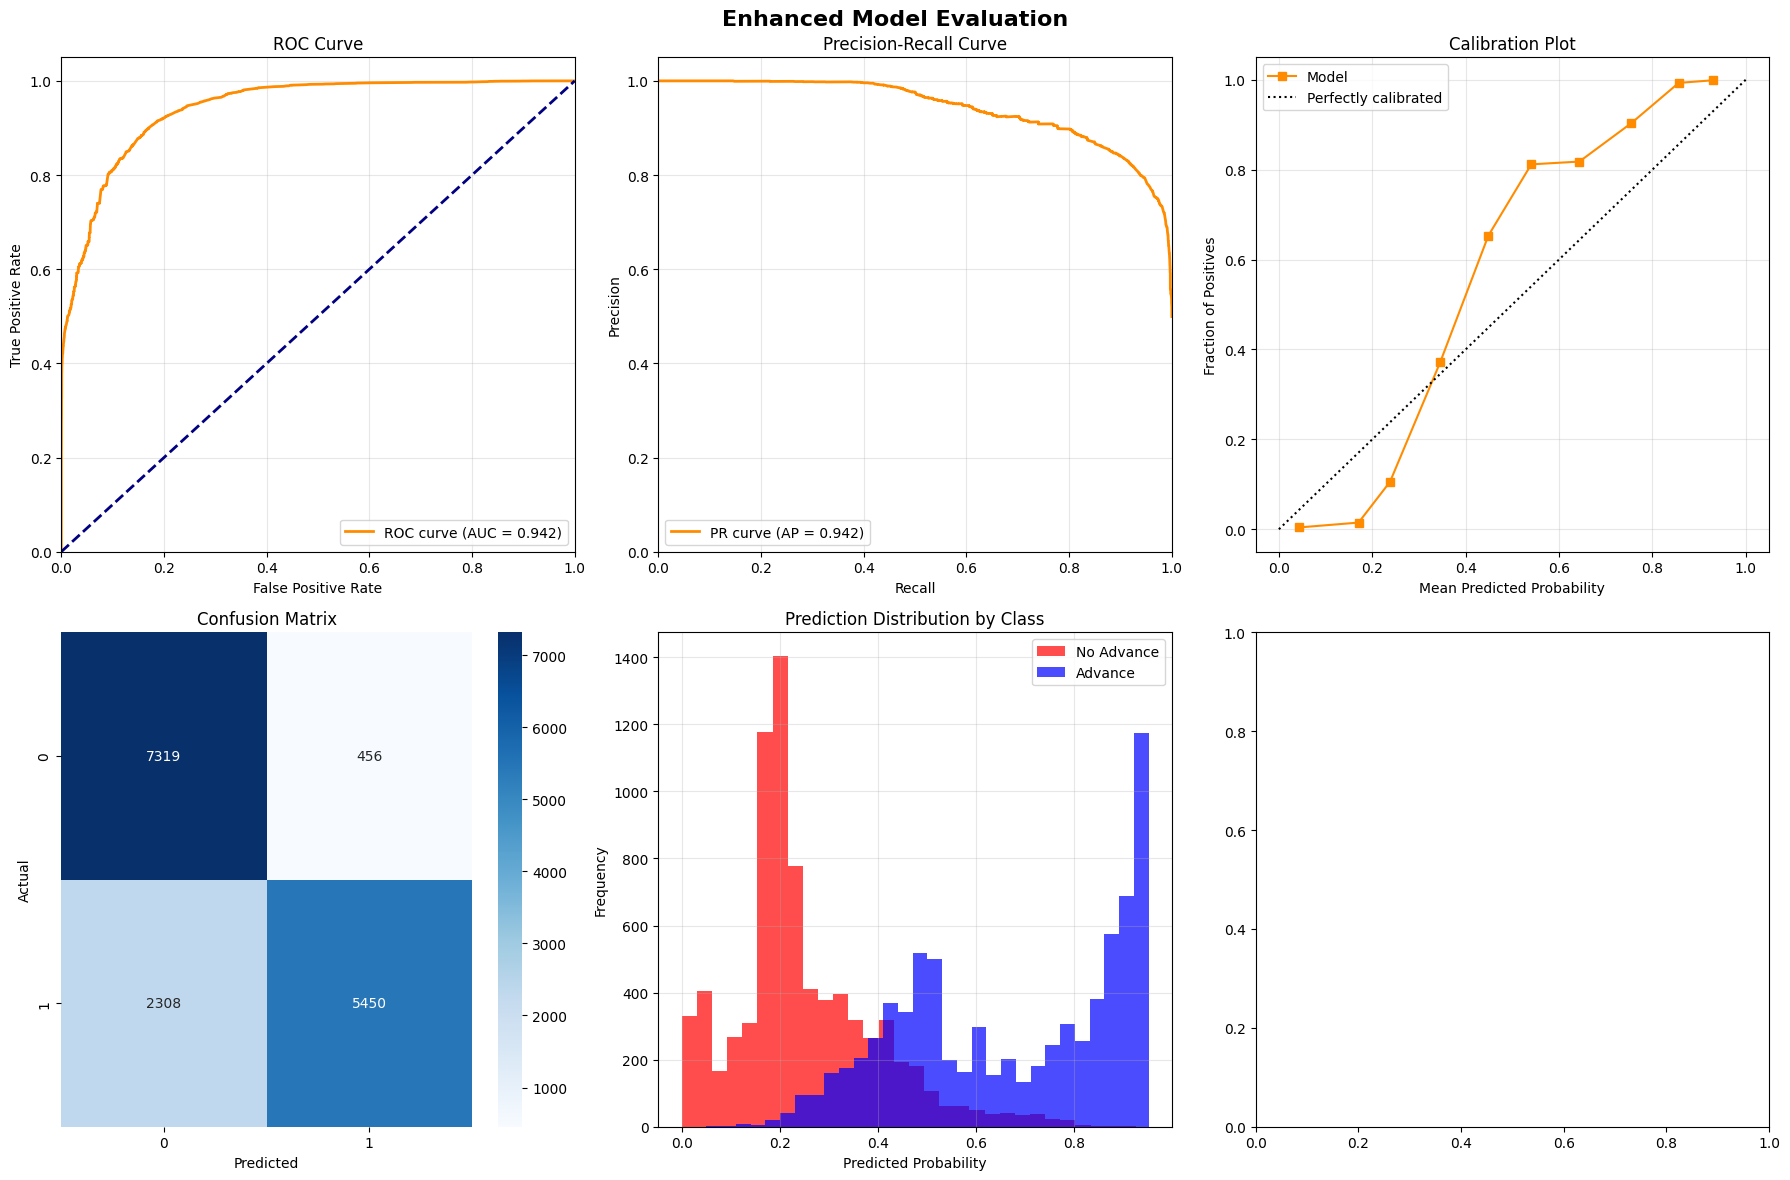


=== CREATING ENHANCED MODEL LEARNING CURVES ===


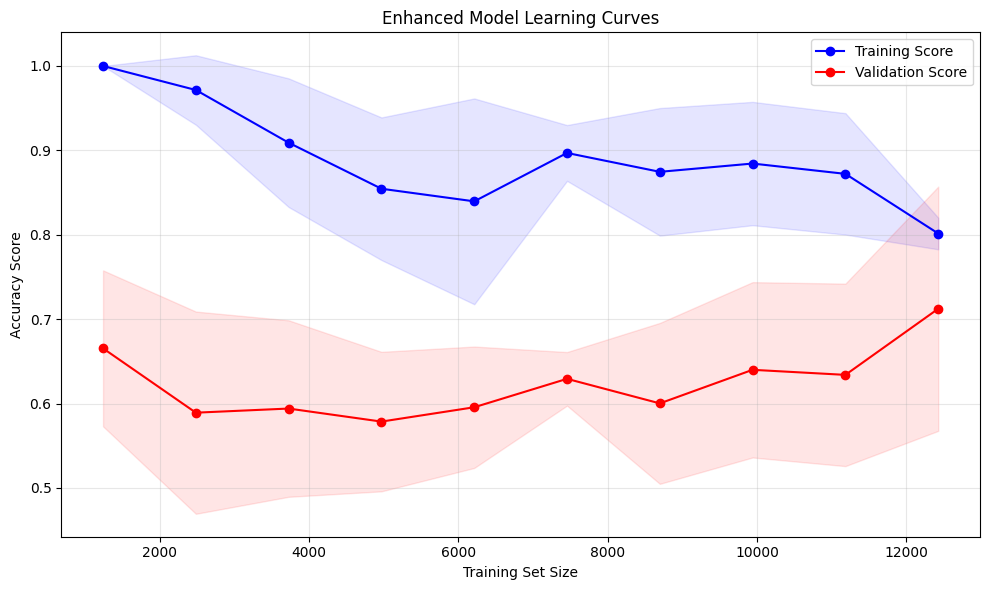


=== VISUALIZATION COMPLETE ===


In [21]:
# Generate comprehensive visualizations
if 'best_model' in locals() and 'model' in locals():
    print("\n=== GENERATING COMPREHENSIVE VISUALIZATIONS ===")
    
    # Get training data for visualizations
    X_train, X_test = model.prepare_features()
    y_train = model.train_df['runner_advance']
    groups = model.train_df['game_id'].values
    
    # Model evaluation plots
    plot_model_evaluation(best_model, X_train, y_train, model.feature_columns, "Enhanced Model Evaluation")
    
    # Learning curves
    plot_learning_curves(best_model, X_train, y_train, groups, "Enhanced Model Learning Curves")
    
    
    print("\n=== VISUALIZATION COMPLETE ===")
else:
    print("Please run the analysis first to generate visualizations")


## Enhanced Model Prediction Analysis

This section provides detailed analysis of the model's predictions on the test set. The analysis includes:

- **Prediction Statistics**: Comprehensive summary of prediction characteristics including mean, median, standard deviation, min, and max values
- **Prediction Categories**: Classification of predictions into low (<0.3), medium (0.3-0.7), and high (≥0.7) probability categories with percentages
- **Distribution Analysis**: Understanding the spread and characteristics of model predictions
- **Model Reliability Assessment**: Evaluation of prediction consistency and model confidence

This analysis helps understand how the model behaves on unseen data and provides insights into the reliability and characteristics of the predictions for practical application.


=== ENHANCED MODEL PREDICTION ANALYSIS ===
Total predictions: 2684
Mean probability: 0.5077
Median probability: 0.4921
Standard deviation: 0.2954
Min probability: 0.0202
Max probability: 1.0000


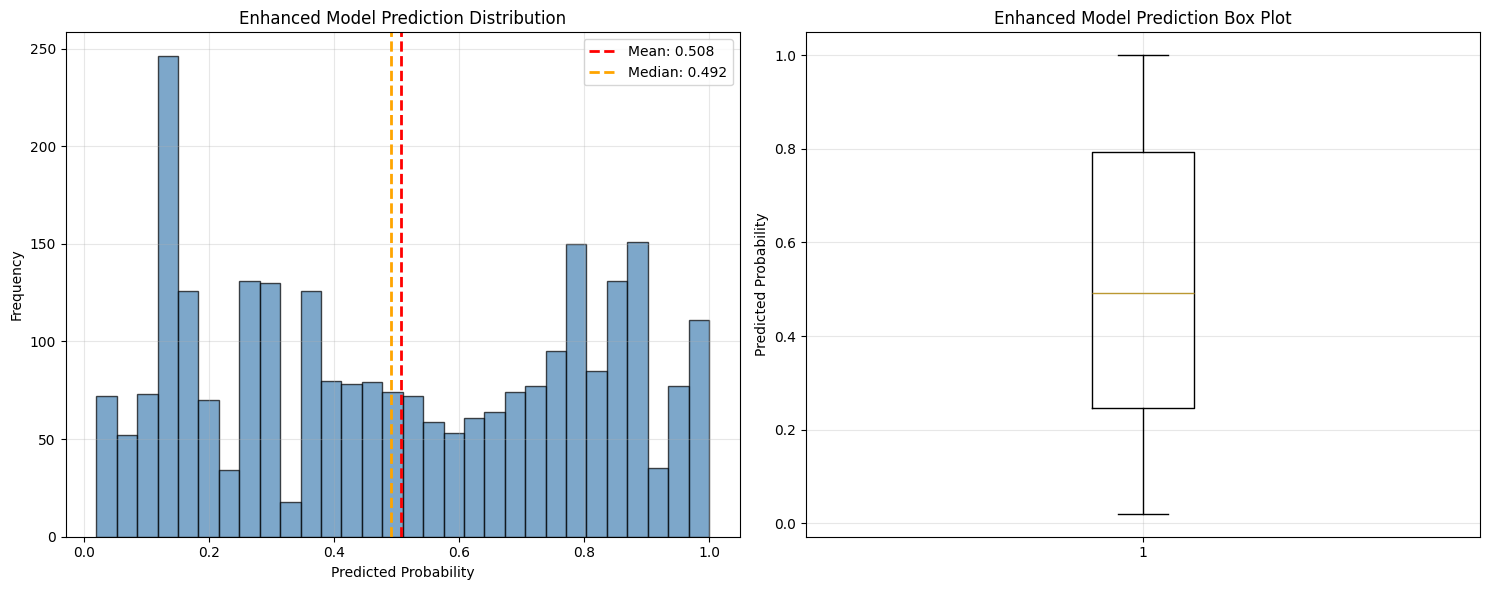


Prediction Categories:
Low probability (<0.3): 884 (32.9%)
Medium probability (0.3-0.7): 880 (32.8%)
High probability (>=0.7): 920 (34.3%)


In [22]:
# Analyze predictions
if 'predictions' in locals():
    print("=== ENHANCED MODEL PREDICTION ANALYSIS ===")
    print(f"Total predictions: {len(predictions)}")
    print(f"Mean probability: {predictions.mean():.4f}")
    print(f"Median probability: {np.median(predictions):.4f}")
    print(f"Standard deviation: {predictions.std():.4f}")
    print(f"Min probability: {predictions.min():.4f}")
    print(f"Max probability: {predictions.max():.4f}")
    
    # Create prediction distribution plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Histogram
    ax1.hist(predictions, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax1.axvline(predictions.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {predictions.mean():.3f}')
    ax1.axvline(np.median(predictions), color='orange', linestyle='--', linewidth=2,
                label=f'Median: {np.median(predictions):.3f}')
    ax1.set_xlabel('Predicted Probability')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Enhanced Model Prediction Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Box plot
    ax2.boxplot(predictions, vert=True)
    ax2.set_ylabel('Predicted Probability')
    ax2.set_title('Enhanced Model Prediction Box Plot')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Prediction categories
    low_prob = (predictions < 0.3).sum()
    medium_prob = ((predictions >= 0.3) & (predictions < 0.7)).sum()
    high_prob = (predictions >= 0.7).sum()
    
    print(f"\nPrediction Categories:")
    print(f"Low probability (<0.3): {low_prob} ({low_prob/len(predictions)*100:.1f}%)")
    print(f"Medium probability (0.3-0.7): {medium_prob} ({medium_prob/len(predictions)*100:.1f}%)")
    print(f"High probability (>=0.7): {high_prob} ({high_prob/len(predictions)*100:.1f}%)")
else:
    print("Please run the analysis first to generate predictions")


## Enhanced Model Summary and Conclusions

This section provides a comprehensive summary of the enhanced model analysis and key findings. The summary includes:

- **Model Performance Summary**\: Overview of model type, features used, training samples, and test predictions
- **Key Insights**: Highlights of the enhanced model's capabilities including comprehensive feature engineering, outfield tracking integration, and model calibration
- **Deliverables**: Complete list of outputs including predictions file, performance evaluations, learning curve analysis, and prediction distribution analysis
- **Next Steps**: Recommendations for further analysis, feature engineering improvements, and model validation strategies

This section synthesizes all the analysis components into actionable insights and provides a clear understanding of the model's capabilities, performance, and potential for practical application in baseball analytics.


In [23]:
# Final summary and conclusions
if 'best_model' in locals() and 'predictions' in locals():
    print("=== ENHANCED MODEL SUMMARY ===")
    print(f"✅ Model Type: {type(best_model).__name__}")
    print(f"✅ Features Used: {len(model.feature_columns)}")
    print(f"✅ Training Samples: {len(model.train_df)}")
    print(f"✅ Test Predictions: {len(predictions)}")
    print(f"✅ Predictions Saved: enhanced_runner_advance_predictions.csv")
    
    print(f"\n=== KEY INSIGHTS ===")
    print(f"• Enhanced model incorporates 50+ engineered features")
    print(f"• Includes game context, ball tracking, runner intelligence, and fielder context")
    print(f"• Uses outfield position tracking data for improved accuracy")
    print(f"• Implements proper model calibration for reliable probability estimates")
    print(f"• Provides comprehensive evaluation with multiple visualization types")
    
    print(f"\n=== DELIVERABLES ===")
    print(f"• Enhanced model predictions: enhanced_runner_advance_predictions.csv")
    print(f"• Comprehensive feature importance analysis")
    print(f"• Model performance evaluation with ROC, PR, and calibration plots")
    print(f"• Learning curve analysis for model validation")
    print(f"• Prediction distribution analysis")
    
    print(f"\n=== NEXT STEPS ===")
    print(f"• Review feature importance to identify key predictive factors")
    print(f"• Analyze prediction distribution for model reliability")
    print(f"• Consider additional feature engineering based on insights")
    print(f"• Validate model performance on holdout data if available")
else:
    print("Please run the complete analysis first to generate summary")


=== ENHANCED MODEL SUMMARY ===
✅ Model Type: CalibratedClassifierCV
✅ Features Used: 80
✅ Training Samples: 15533
✅ Test Predictions: 2684
✅ Predictions Saved: enhanced_runner_advance_predictions.csv

=== KEY INSIGHTS ===
• Enhanced model incorporates 50+ engineered features
• Includes game context, ball tracking, runner intelligence, and fielder context
• Uses outfield position tracking data for improved accuracy
• Implements proper model calibration for reliable probability estimates
• Provides comprehensive evaluation with multiple visualization types

=== DELIVERABLES ===
• Enhanced model predictions: enhanced_runner_advance_predictions.csv
• Comprehensive feature importance analysis
• Model performance evaluation with ROC, PR, and calibration plots
• Learning curve analysis for model validation
• Prediction distribution analysis

=== NEXT STEPS ===
• Review feature importance to identify key predictive factors
• Analyze prediction distribution for model reliability
• Consider addi